In [1]:
#loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#load data
data=pd.read_csv("Height-Weight Data.csv")

In [3]:
df=data.copy()

In [4]:
df.head()#dispaly first 5 rows

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [5]:
df.describe() #display the statistic value

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [6]:
df.shape #dispaly the number of rows and columns

(3501, 2)

In [7]:
df.isnull().sum() #display the number of NA values

Height    0
Weight    0
dtype: int64

In [8]:
df.Height.head()#dispaly the 5 rows of Height data

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [9]:
df.Weight.head()#dispaly the 5 rows of Weight data

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

# Data Visulization

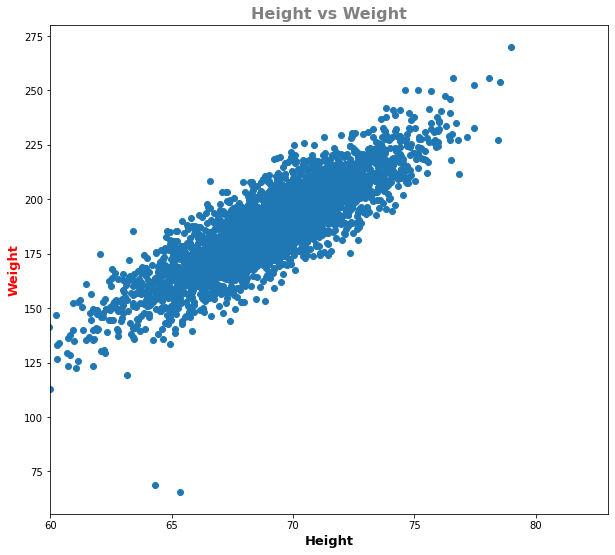

In [10]:
#display the scatter plot
plt.figure(figsize=(10,9))
#plt.scatter(df['Height'],df['Weight'])
plt.scatter(df.Height,df.Weight)
plt.title("Height vs Weight",fontsize=16,fontweight='bold',color='gray')
plt.xlabel("Height",fontsize=13,fontweight='bold',color='black')
plt.ylabel("Weight",fontsize=13,fontweight='bold',color='red')
plt.xlim(60,83,2)
plt.savefig('diet.png')
plt.show()

# Separate Dependent(Y) and Independent(X) variable

In [11]:
x=df.drop('Weight',axis=1) #independent variable
#x=df[['Height']] #2D value
y=df['Weight'] #dependent variable

# Spliting Dataset for traing and testing purpose

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7,random_state=3)#30% Data is set aside for tesing

In [13]:
xtrain

,Height
2010,70.433867
1902,61.764509
1231,71.350783
1089,69.385636
706,68.377580
...,...
3000,67.782658
1667,69.566622
3321,74.066879
1688,73.541184


In [14]:
xtrain.shape #display the shape values for rows and columns

(2450, 1)

In [15]:
xtest.shape

(1051, 1)

# Fitting the model

In [16]:
#Linear Regression model
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [17]:
model.fit(xtrain,ytrain)#train data with the linear model

LinearRegression()

In [18]:
m=model.coef_ #coefficient value(m)

In [19]:
c=model.intercept_ #intercept value(c)

In [20]:
model.predict([[74.110105]]) #predict the weight where height=74.110105

array([216.63421472])

# y=mx+c

In [21]:
y=m*74.110105+c #compare with model predict value
y

array([216.63421472])

# Draw the best Fit line

In [29]:
out=model.predict(xtest)

In [30]:
#df['out']=model.predict(x)
#df.shape

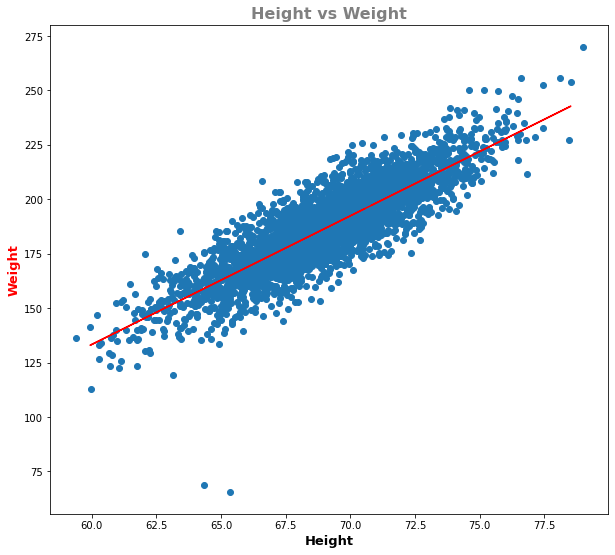

In [31]:
#display the scatter plot
plt.figure(figsize=(10,9))
plt.plot(xtest,out,color='red')#draw the best fit line
plt.scatter(df.Height,df.Weight)#draw the scatter plot
#plt.scatter(df['Height'],df['Weight'])
plt.title("Height vs Weight",fontsize=16,fontweight='bold',color='gray')
plt.xlabel("Height",fontsize=13,fontweight='bold',color='black')
plt.ylabel("Weight",fontsize=13,fontweight='bold',color='red')
#plt.xlim(60,83,2)
plt.savefig('diet.png')
plt.show()

In [32]:
model.score(xtest,ytest)#find the accuracy 

0.7497685775555982

**Notes:**
1. This model gives accuracy of 75% which is not quite good
